In [ ]:
cd

In [ ]:
cd desktop/Python learn/BA

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

customers=pd.read_csv('customers.csv')
subscriptions=pd.read_csv('subscriptions.csv')
order_history=pd.read_csv('order_history.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
order_history_agg=pd.pivot_table(order_history,index=["subscription_id"],values=["order_received"],
               aggfunc=[np.sum, 'count'],fill_value=0)

In [20]:
len(order_history['subscription_id'].unique().tolist())

98945

In [22]:
len(customers['customer_id'].unique().tolist())

98945

In [5]:
order_history_agg['order_rate']=order_history_agg['sum']['order_received']/order_history_agg['count']['order_received']

In [6]:
combined_1=pd.merge(order_history_agg,subscriptions, on="subscription_id", how="inner")
combined=pd.merge(left=combined_1, right=customers, how="inner", on="customer_id")
# pd.merge(left=combined_1, right=customers, on="customer_id", how="inner")
# order_plan_pref.head()
# combined.drop_duplicates( keep="first", inplace=True)

combined['plan_type_x'].unique().tolist()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


['2 Person', 'Family 2', 'Family 4']

In [7]:
combined.drop_duplicates( keep="first", inplace=True)

In [8]:
combined['plan_type_x'].unique().tolist()

['2 Person', 'Family 2', 'Family 4']

In [33]:
import datetime

combined['start_dt']=pd.to_datetime(combined['start_date'])
start_date_dt=combined['start_dt']
# combined.drop(['start_dt','plan_type_x'], axis=1, inplace=True)

combined.shape
combined['start_dt']

0        2015-05-03
1        2015-04-26
2        2015-02-01
3        2015-07-12
4        2015-06-28
5        2015-03-01
6        2015-02-08
7        2015-05-24
8        2015-05-17
9        2015-07-05
10       2015-03-29
11       2015-02-08
12       2015-05-03
13       2015-02-01
14       2015-03-22
15       2015-03-29
16       2015-02-22
17       2015-08-09
18       2015-06-07
19       2015-03-01
20       2015-03-29
22       2015-01-11
24       2015-03-22
26       2015-02-22
27       2015-01-11
28       2015-04-26
29       2015-04-26
30       2015-04-26
31       2015-06-14
32       2015-03-15
            ...    
112310   2015-04-05
112311   2015-06-28
112313   2015-07-12
112314   2015-04-19
112315   2015-01-11
112316   2015-07-19
112317   2015-02-15
112318   2015-08-02
112319   2015-01-04
112321   2015-04-12
112322   2015-02-15
112323   2015-08-23
112324   2015-08-16
112325   2015-06-14
112326   2015-08-23
112327   2015-08-02
112328   2015-06-07
112329   2015-05-03
112330   2015-01-25


In [10]:
combined.columns.get_level_values(0)
combined.columns = [''.join(col).strip() for col in combined.columns.values]
combined.columns

Index(['subscription_id', 'sumorder_received', 'countorder_received',
       'order_rate', 'customer_id', 'plan_type_x', 'protein_preferences',
       'plan_type_y', 'is_churned', 'pref_beef', 'pref_chicken', 'pref_fish',
       'pref_lamb', 'pref_veg', 'lifetime_value', 'start_date', 'start_dt'],
      dtype='object')

In [11]:
set(combined.plan_type_x.unique().tolist())

{'2 Person', 'Family 2', 'Family 4'}

In [12]:
pd.pivot_table(combined,index=["plan_type_x","pref_lamb"],values=["is_churned","sumorder_received",'order_rate'],
               aggfunc=[np.mean, 'count'],fill_value=0)

mean                                   count  \
                      is_churned order_rate sumorder_received is_churned   
plan_type_x pref_lamb                                                      
2 Person    Lamb        0.040781   0.485021          5.845741      27979   
            No lamb     0.041396   0.483225          5.768166      46309   
Family 2    Lamb        0.004684   0.534326          5.548817       4056   
            No lamb     0.000000   0.779639          8.380179      11705   
Family 4    Lamb        0.001908   0.783994          5.395038       2096   
            No lamb     0.012206   0.797527          5.449265       6800   

                                                    
                      order_rate sumorder_received  
plan_type_x pref_lamb                               
2 Person    Lamb           27979             27979  
            No lamb        46309             46309  
Family 2    Lamb            4056              4056  
            No lamb        11705             11705  
Family 4    Lamb            2096              2096  
            No lamb         6800              6800

In [13]:
pd.pivot_table(combined,index=["plan_type_x","pref_fish"],values=["is_churned","sumorder_received",'order_rate'],
               aggfunc=[np.mean, 'count'],fill_value=0)

mean                                   count  \
                      is_churned order_rate sumorder_received is_churned   
plan_type_x pref_fish                                                      
2 Person    Fish        0.064883   0.329382          3.726804      47131   
            No fish     0.000000   0.752069          9.390875      27157   
Family 2    Fish        0.001255   0.716679          7.677738      13548   
            No fish     0.000904   0.715470          7.491188       2213   
Family 4    Fish        0.009588   0.794151          5.457228       8031   
            No fish     0.011561   0.796085          5.243931        865   

                                                    
                      order_rate sumorder_received  
plan_type_x pref_fish                               
2 Person    Fish           47131             47131  
            No fish        27157             27157  
Family 2    Fish           13548             13548  
            No fish         2213              2213  
Family 4    Fish            8031              8031  
            No fish          865               865

In [14]:
pd.pivot_table(combined,index=["plan_type_x","pref_chicken"],values=["is_churned","sumorder_received",'order_rate'],
               aggfunc=[np.mean, 'count'],fill_value=0)

mean                                   count  \
                         is_churned order_rate sumorder_received is_churned   
plan_type_x pref_chicken                                                      
2 Person    Chicken        0.035834   0.521580          6.293108      55645   
            No chicken     0.057072   0.371440          4.317760      18643   
Family 2    Chicken        0.001212   0.716761          7.666869      14850   
            No chicken     0.001098   0.712404          7.401756        911   
Family 4    Chicken        0.009780   0.794339          5.436488       8896   

                                                       
                         order_rate sumorder_received  
plan_type_x pref_chicken                               
2 Person    Chicken           55645             55645  
            No chicken        18643             18643  
Family 2    Chicken           14850             14850  
            No chicken          911               911  
Family 4    Chicken            8896              8896

In [15]:
pd.pivot_table(combined,index=["plan_type_x","pref_veg"],values=["is_churned","sumorder_received",'order_rate'],
               aggfunc=[np.mean, 'count'],fill_value=0)

mean                                   count  \
                          is_churned order_rate sumorder_received is_churned   
plan_type_x pref_veg                                                           
2 Person    No vegetarian   0.043183   0.484776          5.796414      13385   
            Vegetarian      0.040720   0.483709          5.797596      60903   
Family 2    No vegetarian   0.001206   0.716509          7.651545      15761   
Family 4    No vegetarian   0.009780   0.794339          5.436488       8896   

                                                        
                          order_rate sumorder_received  
plan_type_x pref_veg                                    
2 Person    No vegetarian      13385             13385  
            Vegetarian         60903             60903  
Family 2    No vegetarian      15761             15761  
Family 4    No vegetarian       8896              8896

In [16]:
pd.pivot_table(combined,index=["plan_type_x","pref_beef"],values=["is_churned","sumorder_received",'order_rate'],
               aggfunc=[np.mean, 'count'],fill_value=0)

mean                                   count  \
                      is_churned order_rate sumorder_received is_churned   
plan_type_x pref_beef                                                      
2 Person    Beef        0.041659   0.484001          5.815218      50649   
            No beef     0.040103   0.483687          5.759169      23639   
Family 2    Beef        0.001089   0.721539          7.719946      14690   
            No beef     0.002801   0.647516          6.713352       1071   
Family 4    Beef        0.009780   0.794339          5.436488       8896   

                                                    
                      order_rate sumorder_received  
plan_type_x pref_beef                               
2 Person    Beef           50649             50649  
            No beef        23639             23639  
Family 2    Beef           14690             14690  
            No beef         1071              1071  
Family 4    Beef            8896              8896

In [23]:
pd.pivot_table(combined,index=["plan_type_x"],values=["is_churned","sumorder_received",'order_rate'],
               aggfunc=[np.mean, 'count'],fill_value=0)

mean                                   count             \
            is_churned order_rate sumorder_received is_churned order_rate   
plan_type_x                                                                 
2 Person      0.041164   0.483901          5.797383      74288      74288   
Family 2      0.001206   0.716509          7.651545      15761      15761   
Family 4      0.009780   0.794339          5.436488       8896       8896   

                               
            sumorder_received  
plan_type_x                    
2 Person                74288  
Family 2                15761  
Family 4                 8896

(array([   15.,   117.,   317.,   600.,   776.,  1243.,  1859.,  1852.,
         2431.,  2730.,  4209.,  1830.,  3008.,  2235.,  6722.,   564.,
         1280.,  1994.,  3364.,  1846.,  1275.,   613.,   196.,  6935.,
          506.,  1175.,  1140.,   670.,  2443.,  1775.,   851.,  6984.,
         1220.,  3167.,  1756.,  5547.,  2497.,   891.,  4999.,  2944.,
         2468.,  1478.,  1049.,  1123.,   487.,   168.,    22.,  5574.]),
 array([ 0.03225806,  0.05241935,  0.07258065,  0.09274194,  0.11290323,
         0.13306452,  0.15322581,  0.1733871 ,  0.19354839,  0.21370968,
         0.23387097,  0.25403226,  0.27419355,  0.29435484,  0.31451613,
         0.33467742,  0.35483871,  0.375     ,  0.39516129,  0.41532258,
         0.43548387,  0.45564516,  0.47580645,  0.49596774,  0.51612903,
         0.53629032,  0.55645161,  0.5766129 ,  0.59677419,  0.61693548,
         0.63709677,  0.65725806,  0.67741935,  0.69758065,  0.71774194,
         0.73790323,  0.75806452,  0.77822581,  0.79838

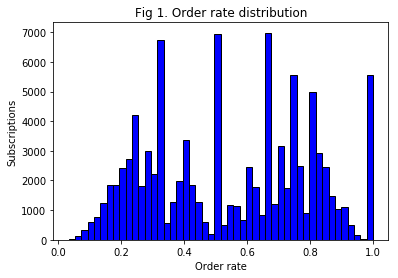

In [24]:
plt.xlabel('Order rate')
plt.ylabel('Subscriptions')
plt.title('Fig 1. Order rate distribution')

plt.hist(order_history_agg['order_rate'], color='blue', edgecolor='black', bins=48)

In [26]:
combined['order_rate'].mean()

0.5488644467292294

In [38]:
combined.head()

,subscription_id,sumorder_received,countorder_received,order_rate,customer_id,plan_type_x,protein_preferences,plan_type_y,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date,start_dt
0,10000114,2,5,0.400000,15776,2 Person,"Chicken,No beef,Fish,Lamb,Vegetarian",2 Person,False,No beef,Chicken,Fish,Lamb,Vegetarian,150.478975,2015-05-03,2015-05-03
1,10000158,2,2,1.000000,82857,2 Person,"Chicken,No beef,No fish,No lamb,No vegetarian",2 Person,False,No beef,Chicken,No fish,No lamb,No vegetarian,367.895150,2015-04-26,2015-04-26
2,10000283,2,4,0.500000,29092,2 Person,"No chicken,No beef,Fish,No lamb,No vegetarian",2 Person,False,No beef,No chicken,Fish,No lamb,No vegetarian,193.522628,2015-02-01,2015-02-01
3,10000335,2,3,0.666667,5834,2 Person,"Chicken,Beef,No fish,No lamb,Vegetarian",2 Person,False,Beef,Chicken,No fish,No lamb,Vegetarian,470.824730,2015-07-12,2015-07-12
4,10000378,19,21,0.904762,13931,2 Person,"No chicken,Beef,No fish,No lamb,No vegetarian",2 Person,False,Beef,No chicken,No fish,No lamb,No vegetarian,426.966588,2015-06-28,2015-06-28


In [31]:
combined.dtypes

subscription_id                 int64
sumorder_received               int64
countorder_received             int64
order_rate                    float64
customer_id                     int64
plan_type_x                    object
protein_preferences            object
plan_type_y                    object
is_churned                       bool
pref_beef                      object
pref_chicken                   object
pref_fish                      object
pref_lamb                      object
pref_veg                       object
lifetime_value                float64
start_date                     object
start_dt               datetime64[ns]
dtype: object

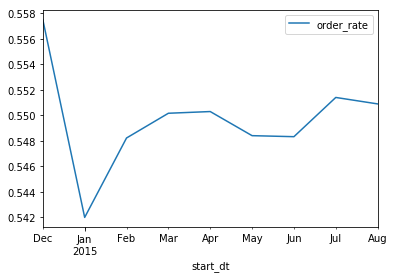

In [37]:
import datetime as dt
combined.loc[:,['order_rate','start_dt']].groupby(start_date_dt.dt.to_period('M')).mean().plot()


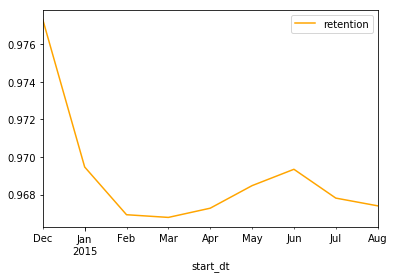

In [45]:
combined
combined_cohort_churn=combined.loc[:,['is_churned','start_dt']].groupby(start_date_dt.dt.to_period('M')).mean()
combined_cohort_churn['retention']=1-combined_cohort_churn['is_churned']
combined_cohort_churn.drop('is_churned', axis=1).plot(color='orange')


In [141]:
combined_cohort_churn_plan_pref=combined.loc[:,['is_churned','start_dt','plan_type_x', 'protein_preferences']].groupby(['plan_type_x','protein_preferences',start_date_dt.dt.to_period('M')]).mean()

In [86]:
combined_cohort_churn_plan_pref=combined_cohort_churn_plan_pref.reset_index()
combined_cohort_churn_plan_pref['retention']=1-combined_cohort_churn_plan_pref['is_churned']
combined_cohort_churn_plan_pref.head(15)

,plan_type_x,protein_preferences,start_dt,is_churned,retention
0,2 Person,"Chicken,Beef,Fish,Lamb,No vegetarian",2014-12,0.153846,0.846154
1,2 Person,"Chicken,Beef,Fish,Lamb,No vegetarian",2015-01,0.076142,0.923858
2,2 Person,"Chicken,Beef,Fish,Lamb,No vegetarian",2015-02,0.092920,0.907080
3,2 Person,"Chicken,Beef,Fish,Lamb,No vegetarian",2015-03,0.059524,0.940476
4,2 Person,"Chicken,Beef,Fish,Lamb,No vegetarian",2015-04,0.121951,0.878049


In [101]:
combined_cohort_churn_plan_pref.to_excel("retention by month by plan by preference.xlsx")

In [88]:
combined_LTV=pd.merge(left=combined,right=combined_cohort_churn_plan_pref,how='left', left_on=['plan_type_x','protein_preferences','start_month'],right_on=['plan_type_x','protein_preferences','start_dt'])

In [102]:
combined_LTV_all=combined_LTV.drop(['plan_type_y','start_date','start_dt_x','start_dt_y','is_churned_x',],axis=1)

In [103]:
combined_LTV_all.to_excel("output.xlsx")

In [57]:
order_rate=combined.loc[:,['order_rate','start_dt']].groupby(start_date_dt.dt.to_period('M')).mean()

In [61]:
combined['start_month']=combined['start_dt'].dt.to_period('M')
combined['start_month']
combined_LTV=pd.merge(combined, combined_cohort_churn, left_on='start_month', right_on='start_dt', how='left')
combined_LTV.head()

,subscription_id,sumorder_received,countorder_received,order_rate,customer_id,plan_type_x,protein_preferences,plan_type_y,is_churned_x,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date,start_dt,start_month,is_churned_y,retention
0,10000114,2,5,0.400000,15776,2 Person,"Chicken,No beef,Fish,Lamb,Vegetarian",2 Person,False,No beef,Chicken,Fish,Lamb,Vegetarian,150.478975,2015-05-03,2015-05-03,2015-05,0.031526,0.968474
1,10000158,2,2,1.000000,82857,2 Person,"Chicken,No beef,No fish,No lamb,No vegetarian",2 Person,False,No beef,Chicken,No fish,No lamb,No vegetarian,367.895150,2015-04-26,2015-04-26,2015-04,0.032728,0.967272
2,10000283,2,4,0.500000,29092,2 Person,"No chicken,No beef,Fish,No lamb,No vegetarian",2 Person,False,No beef,No chicken,Fish,No lamb,No vegetarian,193.522628,2015-02-01,2015-02-01,2015-02,0.033076,0.966924
3,10000335,2,3,0.666667,5834,2 Person,"Chicken,Beef,No fish,No lamb,Vegetarian",2 Person,False,Beef,Chicken,No fish,No lamb,Vegetarian,470.824730,2015-07-12,2015-07-12,2015-07,0.032190,0.967810
4,10000378,19,21,0.904762,13931,2 Person,"No chicken,Beef,No fish,No lamb,No vegetarian",2 Person,False,Beef,No chicken,No fish,No lamb,No vegetarian,426.966588,2015-06-28,2015-06-28,2015-06,0.030655,0.969345


In [105]:
combined_LTV_all.head()

,subscription_id,sumorder_received,countorder_received,order_rate,customer_id,plan_type_x,protein_preferences,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_month,is_churned_y,retention
0,10000114,2,5,0.400000,15776,2 Person,"Chicken,No beef,Fish,Lamb,Vegetarian",No beef,Chicken,Fish,Lamb,Vegetarian,150.478975,2015-05,0.039773,0.960227
1,10000158,2,2,1.000000,82857,2 Person,"Chicken,No beef,No fish,No lamb,No vegetarian",No beef,Chicken,No fish,No lamb,No vegetarian,367.895150,2015-04,0.000000,1.000000
2,10000283,2,4,0.500000,29092,2 Person,"No chicken,No beef,Fish,No lamb,No vegetarian",No beef,No chicken,Fish,No lamb,No vegetarian,193.522628,2015-02,0.059524,0.940476
3,10000335,2,3,0.666667,5834,2 Person,"Chicken,Beef,No fish,No lamb,Vegetarian",Beef,Chicken,No fish,No lamb,Vegetarian,470.824730,2015-07,0.000000,1.000000
4,10000378,19,21,0.904762,13931,2 Person,"No chicken,Beef,No fish,No lamb,No vegetarian",Beef,No chicken,No fish,No lamb,No vegetarian,426.966588,2015-06,0.000000,1.000000


In [112]:
combined_LTV_all_1=pd.get_dummies(combined_LTV_all, columns=['plan_type_x'])


In [117]:
combined_LTV_all_1.pref_beef.replace({'No beef': 0, 'Beef':1}, inplace=True)
combined_LTV_all_1.pref_chicken.replace({'No chicken': 0, 'Chicken':1}, inplace=True)
combined_LTV_all_1.pref_fish.replace({'No fish': 0, 'Fish':1}, inplace=True)
combined_LTV_all_1.pref_lamb.replace({'No lamb': 0, 'Lamb':1}, inplace=True)
combined_LTV_all_1.pref_veg.replace({'No vegetarian': 0, 'Vegetarian':1}, inplace=True)


In [119]:
combined_LTV_all_1.to_excel("output2.xlsx")

In [120]:
combined_LTV_all_1.head()

,subscription_id,sumorder_received,countorder_received,order_rate,customer_id,protein_preferences,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_month,is_churned_y,retention,plan_type_x_2 Person,plan_type_x_Family 2,plan_type_x_Family 4
0,10000114,2,5,0.400000,15776,"Chicken,No beef,Fish,Lamb,Vegetarian",0,1,1,1,1,150.478975,2015-05,0.039773,0.960227,1,0,0
1,10000158,2,2,1.000000,82857,"Chicken,No beef,No fish,No lamb,No vegetarian",0,1,0,0,0,367.895150,2015-04,0.000000,1.000000,1,0,0
2,10000283,2,4,0.500000,29092,"No chicken,No beef,Fish,No lamb,No vegetarian",0,0,1,0,0,193.522628,2015-02,0.059524,0.940476,1,0,0
3,10000335,2,3,0.666667,5834,"Chicken,Beef,No fish,No lamb,Vegetarian",1,1,0,0,1,470.824730,2015-07,0.000000,1.000000,1,0,0
4,10000378,19,21,0.904762,13931,"No chicken,Beef,No fish,No lamb,No vegetarian",1,0,0,0,0,426.966588,2015-06,0.000000,1.000000,1,0,0


In [136]:

combined_LTV_all_1.dropna(axis=0,how='any',inplace=True)
x=combined_LTV_all_1.drop(['countorder_received','subscription_id','sumorder_received','customer_id','protein_preferences','start_month','is_churned_y','lifetime_value'],axis=1)
y=combined_LTV_all_1['lifetime_value']


In [137]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
x.columns

Index(['order_rate', 'pref_beef', 'pref_chicken', 'pref_fish', 'pref_lamb',
       'pref_veg', 'retention', 'plan_type_x_2 Person', 'plan_type_x_Family 2',
       'plan_type_x_Family 4'],
      dtype='object')

In [139]:
regression_model.coef_

array([  151.08553319,    19.58470523,    12.77031066,   -85.86912086,
         -43.78679366,    -3.55020429,  2030.26838235,   -87.63553971,
           9.72369917,    77.91184053])

In [ ]:
LTV=151* ['order_rate']+19.6*['pref_beef']+12.8*['pref_chicken']-86*['pref_fish']-44*['pref_lamb']-3['pref_veg']+2030['retention']
-87.6*['2 Person']+9.7*['Family 2']+78*['Family 4']

In [140]:
regression_model.score(x, y)

0.81994657271088311